In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install pyts

     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd

In [16]:
data = pd.read_csv('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/final_segmented_data/set1.csv')

In [17]:
data

,label,0,1,2,3,4,5,6,7,8,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,Normal,3,26,64,117,149,125,67,119,171,...,13838.0,12731.0,11602.0,10452.0,9289.0,8262.0,7144.0,6443.0,5412.0,5269.0
1,Normal,-437,-2004,-3509,-4823,-5998,-6906,-7645,-8232,-8666,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,Normal,-35,-165,-294,-410,-503,-583,-650,-689,-720,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,Normal,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
4,Abnormal,0,0,0,0,0,0,0,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Normal,2587,3126,3449,3449,3018,2479,1725,1078,431,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
496,Normal,0,0,0,0,0,0,0,0,0,...,4148.0,2489.0,830.0,415.0,-415.0,0.0,-415.0,-830.0,-830.0,-2074.0
497,Normal,-2607,-2234,-2234,-2607,-1862,-2234,-2234,-1862,-1862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,Normal,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0


In [23]:
data=data.fillna(0)

In [24]:
data.isna().sum()

label    0
0        0
1        0
2        0
3        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Length: 16001, dtype: int64

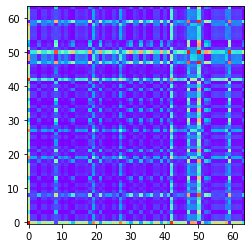

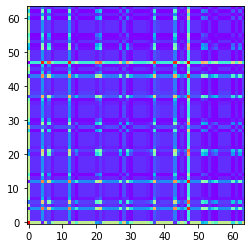

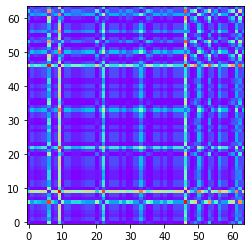

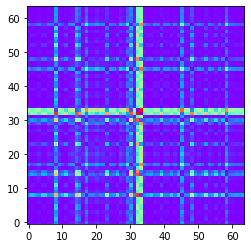

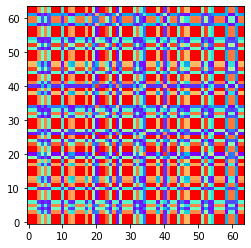

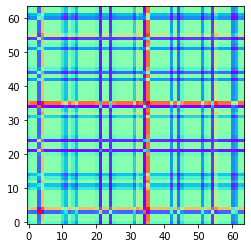

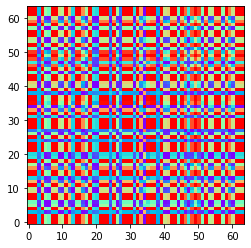

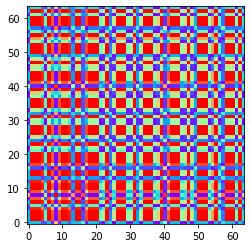

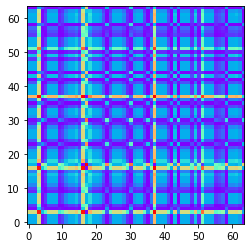

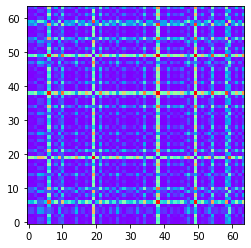

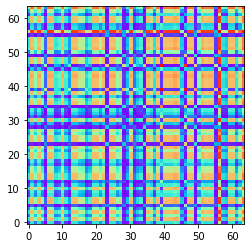

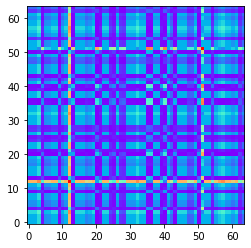

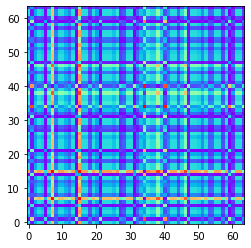

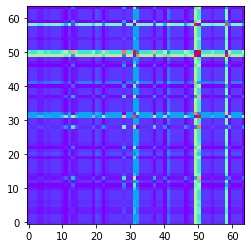

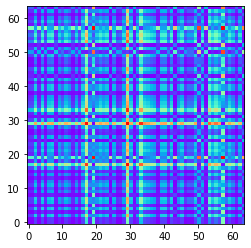

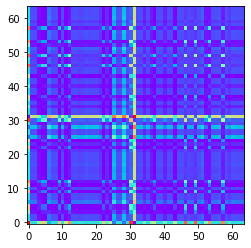

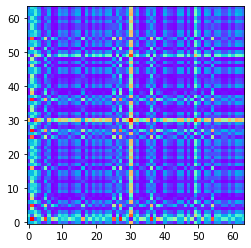

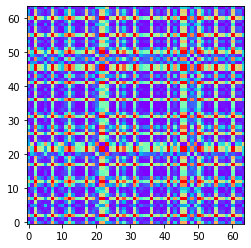

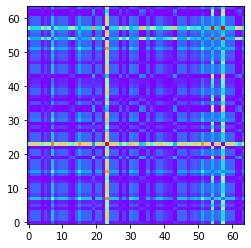

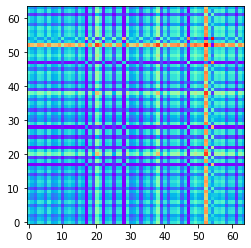

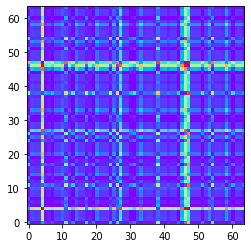

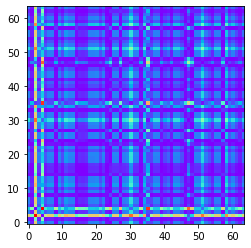

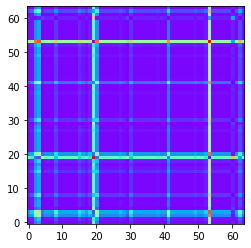

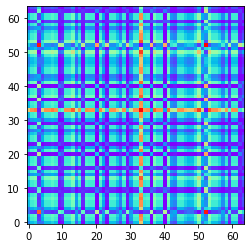

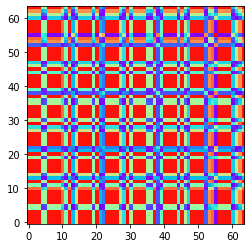

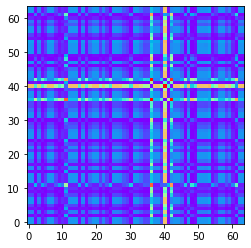

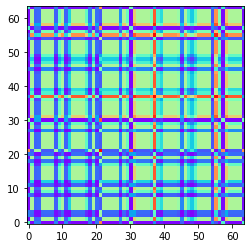

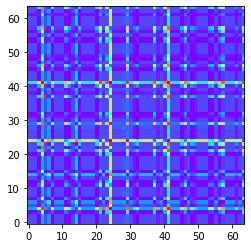

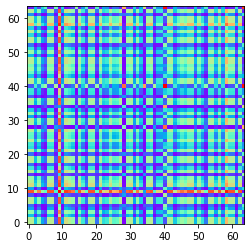

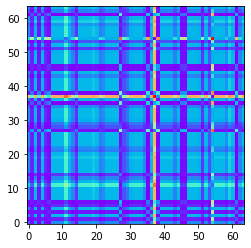

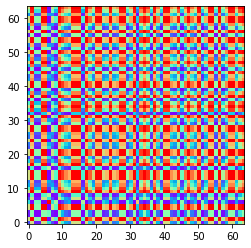

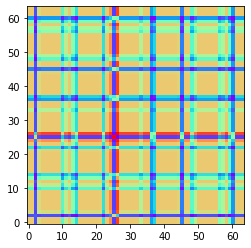

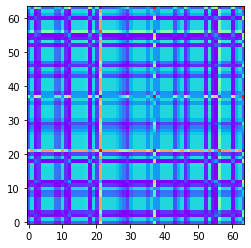

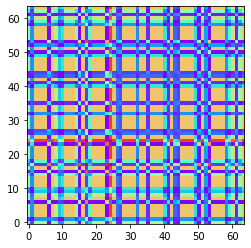

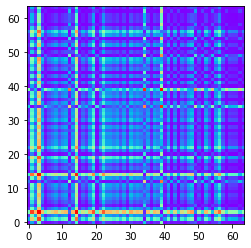

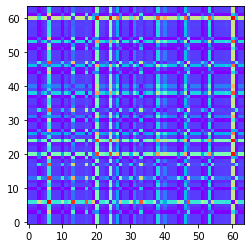

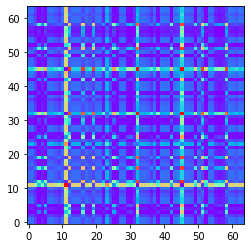

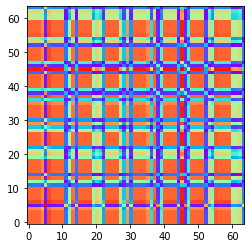

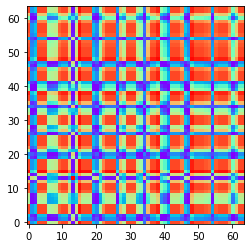

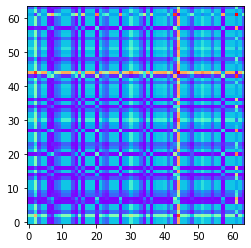

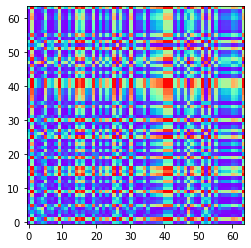

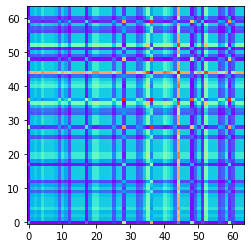

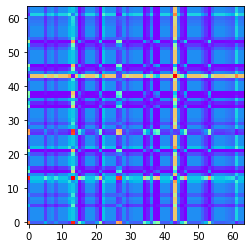

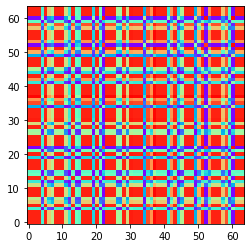

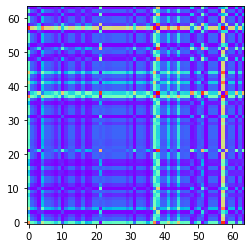

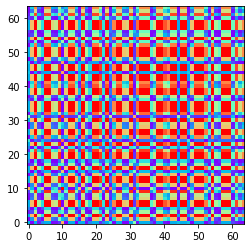

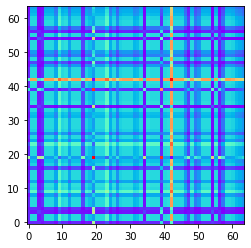

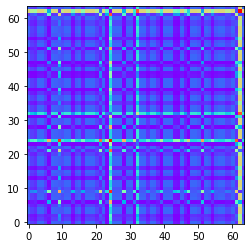

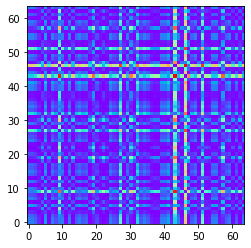

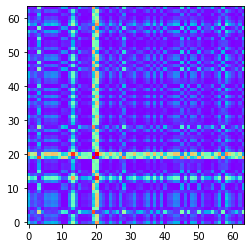

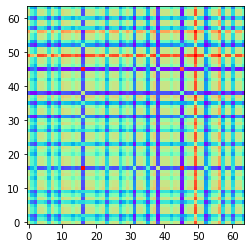

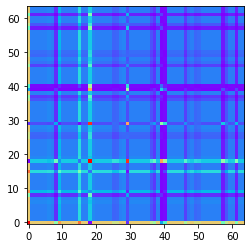

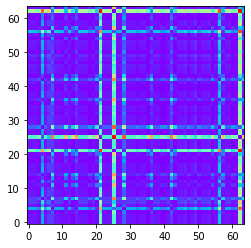

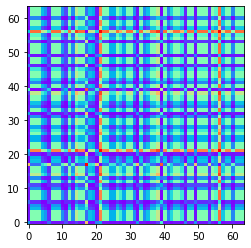

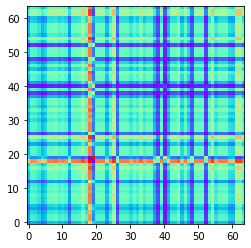

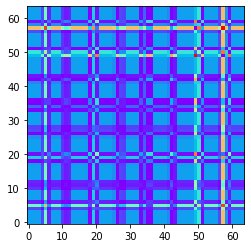

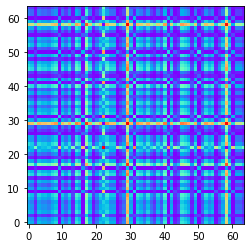

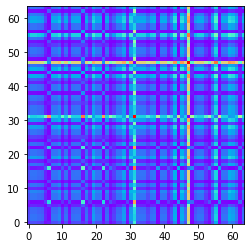

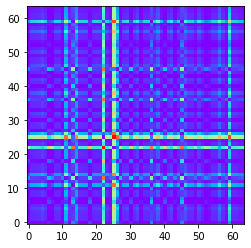

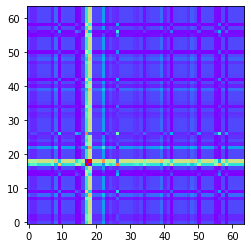

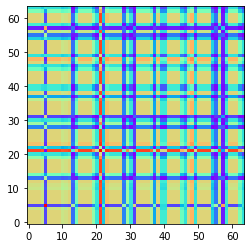

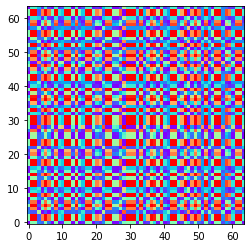

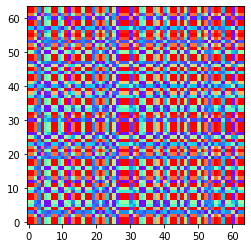

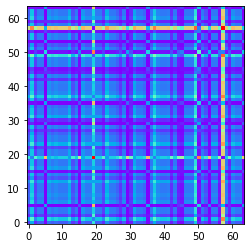

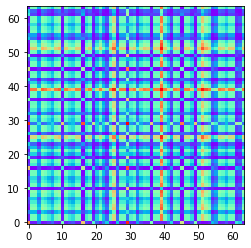

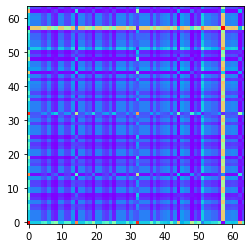

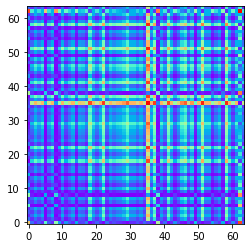

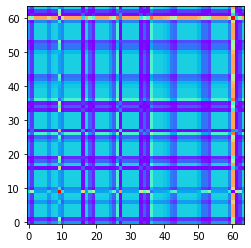

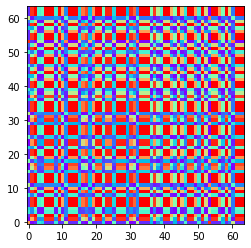

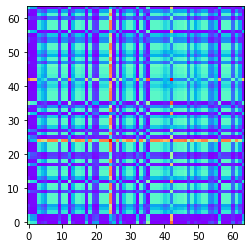

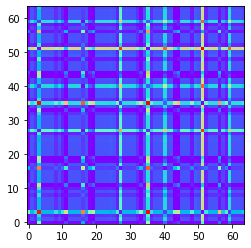

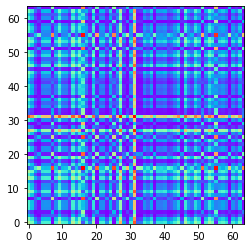

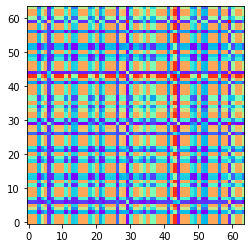

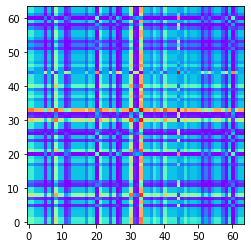

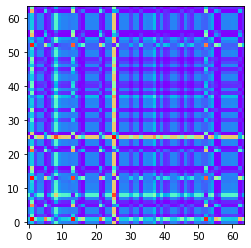

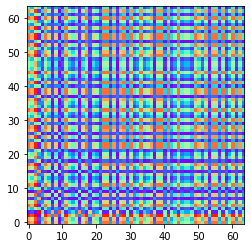

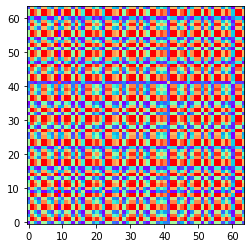

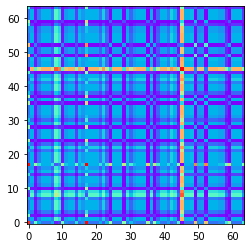

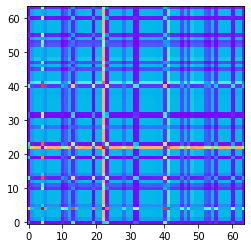

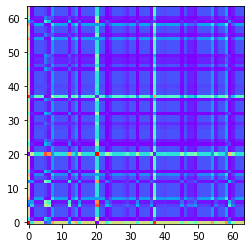

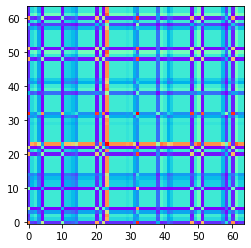

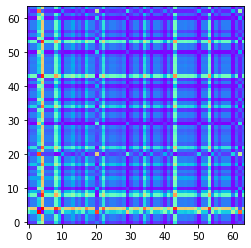

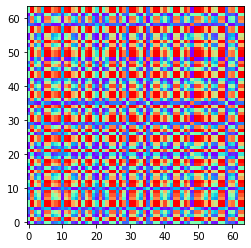

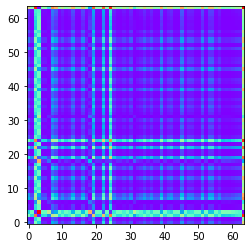

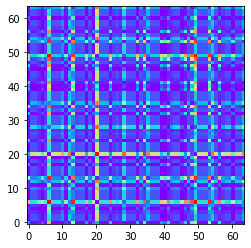

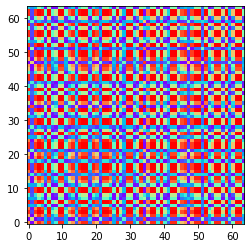

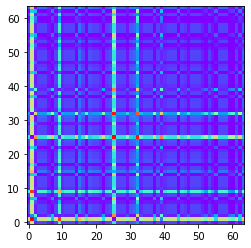

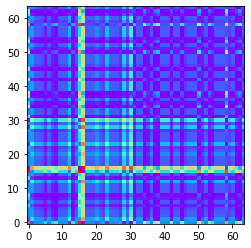

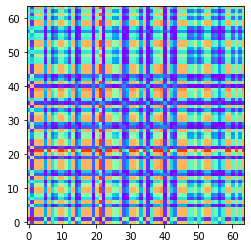

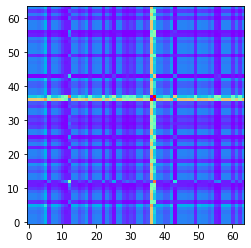

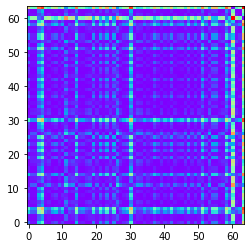

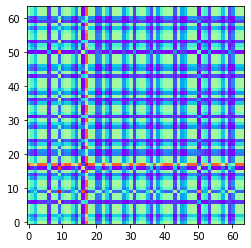

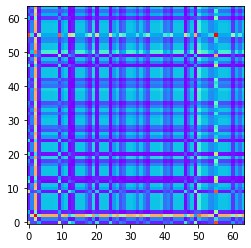

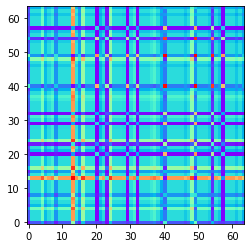

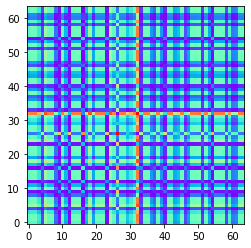

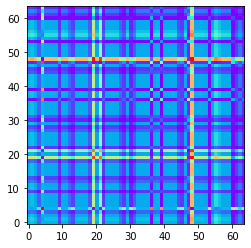

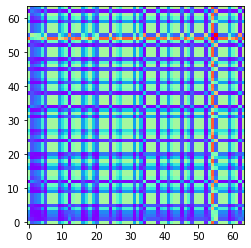

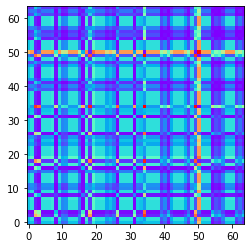

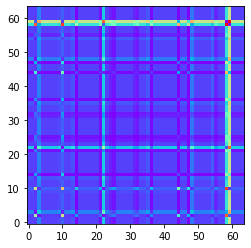

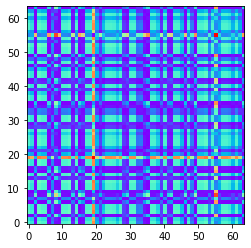

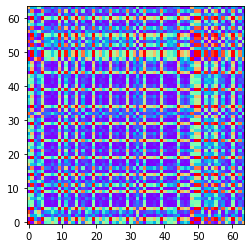

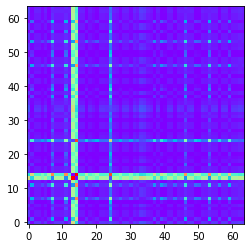

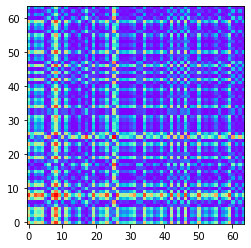

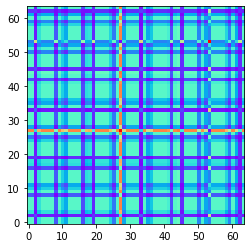

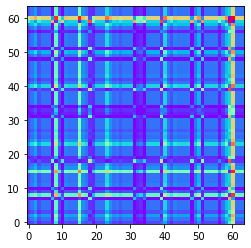

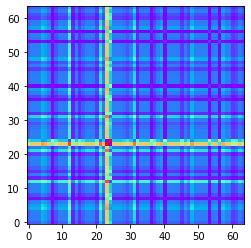

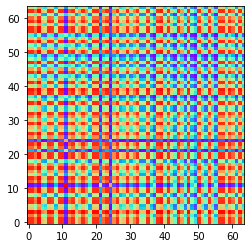

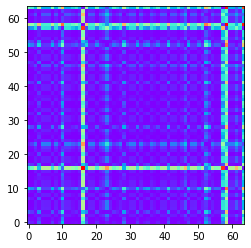

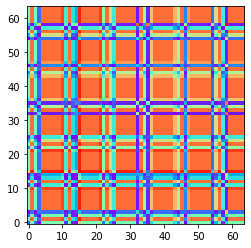

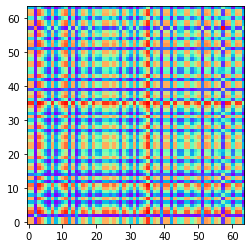

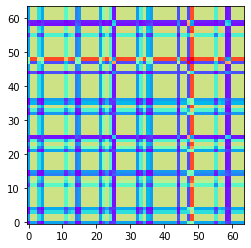

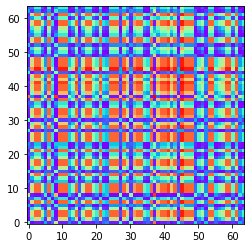

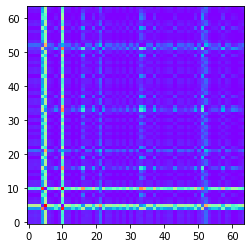

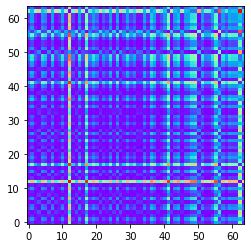

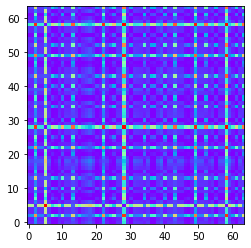

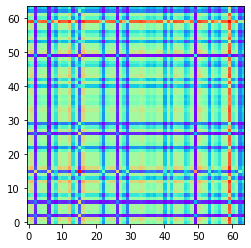

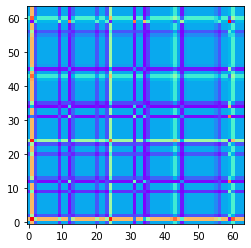

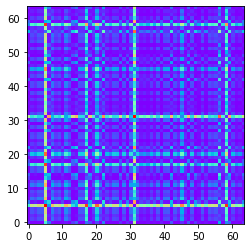

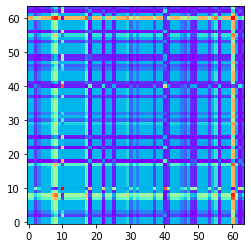

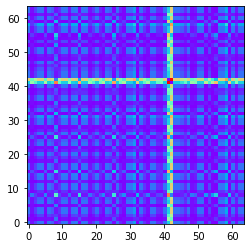

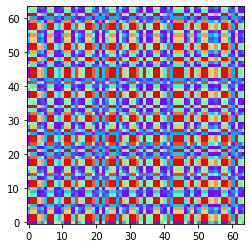

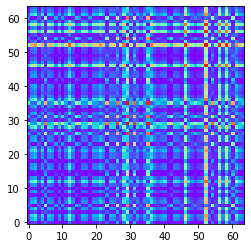

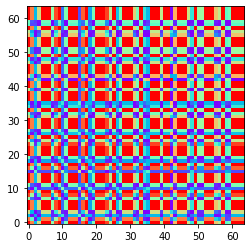

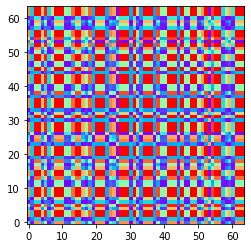

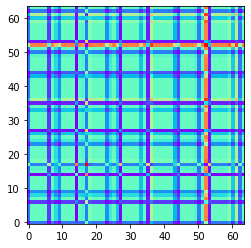

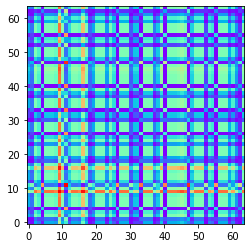

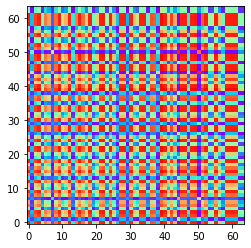

In [ ]:
for i in range(500):
  temp=data.iloc[i,1:].to_numpy()
  temp = temp.reshape(1, -1)
  gasf = GramianAngularField(method='summation',image_size=64)
  X_gasf = gasf.fit_transform(temp)

  fig = plt.figure()
  grid = ImageGrid(fig, 111,
                  nrows_ncols=(1, 1),
                  axes_pad=0.15,
                  share_all=True,
                  )
  images = [X_gasf[0]]
  #titles = ['Summation', 'Difference']
  for image, ax in zip(images, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    #ax.set_title(title, fontdict={'fontsize': 12})
  #ax.cax.colorbar(im)
  #ax.cax.toggle_label(True)
  #plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
  if(data.iloc[i,0]=='Abnormal'):
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GASF/Abnormal/gasf_set1_'+str(i)+'.jpg')
  elif(data.iloc[i,0]=='Normal'):
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GASF/Normal/gasf_set1_'+str(i)+'.jpg')
  elif(data.iloc[i,0]=='ERROR'):
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GASF/Error/gasf_set1_'+str(i)+'.jpg')
  else:
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GASF/Unsure/gasf_set1_'+str(i)+'.jpg')
  plt.show()

In [ ]:
for i in range(500):
  temp=data.iloc[i,1:].to_numpy()
  temp = temp.reshape(1, -1)
  gasf = GramianAngularField(method='difference',image_size=64)
  X_gadf = gasf.fit_transform(temp)

  fig = plt.figure()
  grid = ImageGrid(fig, 111,
                  nrows_ncols=(1, 1),
                  axes_pad=0.15,
                  share_all=True,
                  )
  images = [X_gadf[0]]
  #titles = ['Summation', 'Difference']
  for image, ax in zip(images, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    #ax.set_title(title, fontdict={'fontsize': 12})
  #ax.cax.colorbar(im)
  #ax.cax.toggle_label(True)
  #plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
  if(data.iloc[i,0]=='Abnormal'):
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GADF/Abnormal/gadf_set1_'+str(i)+'.jpg')
  elif(data.iloc[i,0]=='Normal'):
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GADF/Normal/gadf_set1_'+str(i)+'.jpg')
  elif(data.iloc[i,0]=='ERROR'):
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GADF/Error/gadf_set1_'+str(i)+'.jpg')
  else:
    plt.savefig('/content/drive/MyDrive/DATA VISUALIZATION/2016_dataset/Image_data/GADF/Unsure/gadf_set1_'+str(i)+'.jpg')
  plt.show()